In [5]:
#  РАЗДЕЛ 2. Кросс-валидация

# 1. Импорт необходимых модулей
from sklearn import tree
from sklearn.model_selection import cross_val_score
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 2. Настройка визуализации

In [8]:
# 3. Загрузка данных
df = pd.read_csv('train.csv')

# 4. Подготовка данных
df.isnull().sum()
X = df.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis=1)
X = pd.get_dummies(X) # - преобразование категориальных признаков
X = X.fillna({'Age':X.Age.median()})
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [9]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)

cross_val_score(clf, X_train, y_train, cv=5 )

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [12]:
# используем также оценку точности предсказаний в случае применения кросс-валидации по 5 фолдам

train_score=list()
test_score=list()
cross_score=list()
for i in range(1,100):
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))
    cross_score.append(cross_val_score(clf,X_train,y_train,cv=5).mean())

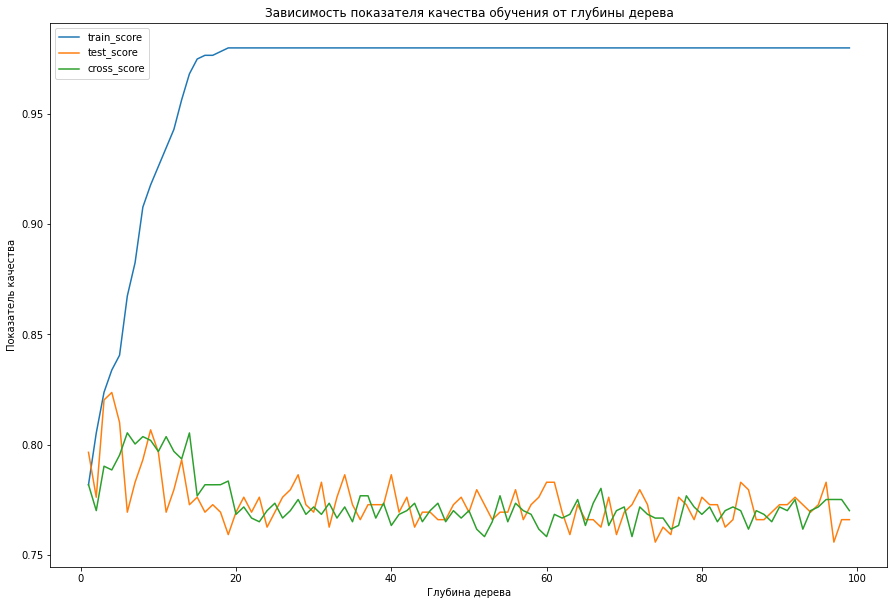

In [13]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes()

ax.plot(range(1,100),train_score, label='train_score')
ax.plot(range(1,100),test_score, label='test_score')
ax.plot(range(1,100),cross_score, label='cross_score')

# Подписи на осях, заголовок и легенда графика
plt.title('Зависимость показателя качества обучения от глубины дерева')
plt.xlabel('Глубина дерева')
plt.ylabel('Показатель качества')
plt.legend()

In [14]:
# Приблизительно при глубине 10 достигается оптимальная глубина при проверках на кросс-валидации
# Проведем расчет для тестовой выборки

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)
clf.fit(X_train, y_train)

cross_val_score(clf,X_test,y_test,cv=5).mean()

0.7898305084745763

In [ ]:
# Это значение можно считать более реалистичным